In [1]:
import numpy as np
import pandas as pd
import math
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import folium  
from folium.plugins import HeatMap

### EDA on Chicago Crash Datasets (2018-2021)

`The goal of explanatory data analysis on chicago crash datasets is to investigate if there are visible changes
is in road accidents trend pre and post COVID-19. Initial hypothesis is that the number and severity (measured in this case
by the number of fatal accidents) declined after COVID-19 as a result of national guidelines during the pandamic. In early 2020, there was a national shutdown guideline that altered the nature of events and the livelihood of many subsequently.
Such guidelines impacted/altered business operations, social interactions and the health conditions for many. One of the resulting effect of COIVD-19 was shift in work enviroment as a number of companies allowed employees to work remotely as nature of work allowed, and the uncertaining surrounding the virus prompted individuals to limit going out side of their home.`

`As there was a substantial reduction of movements in earlier months (years in certain cases) of the pandamic it is fair to project the number of road accidents declined overall and in the selected region, Chicago, IL. As the number of road accidents decline, fatal crashes may have also declined.`

`Analysis below aims to look deeper in changes in road crash trend pre and post COVID-19 by prevalent factors associated with
road accidents such as day of week, time of day, month of year, year, road conditions, weather conditions, location of crash, sex of those invoved in a crash, and vehicle features (make year).`

`Chicago Crash Data 
Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD).` <a href="https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if"><code>.datalink</code></a>

In [2]:
#-------------- Read Clean Version Chicago Crash Data

crash_df = pd.read_csv("chicago_data/chicago_clean_crash_2022.csv", index_col=False)
crash_df = crash_df.iloc[: , 1:]

In [3]:
crash_df.shape

(433395, 18)

In [4]:
#--------------- Check Data sample
crash_df.head(2)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,WEEK_DAY_NAME
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,35,CLEAR,DRY,NO_DEFECTS,NO INJURY / DRIVE AWAY,2.0,0,0,0,17,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,Wednesday
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,30,CLEAR,DRY,NO_DEFECTS,NO INJURY / DRIVE AWAY,3.0,0,0,0,10,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),2020,Friday


In [5]:
"""
Rename crash month & hour column names for simplicity
"""
col = {"CRASH_MONTH":"MONTH","CRASH_HOUR":"HOUR"}
crash_df = crash_df.rename(columns=col)


In [6]:
"""
By plotting a heatmap of crash year and month check to view if there
is a correlation between these features and number of accidents
as well as changes in trend due to COVID-19
"""

MMYYYY = crash_df.groupby(['YEAR', 'MONTH']).size().reset_index().rename(columns={0:"CRASHES"})
MMYYYY.head(2)

,YEAR,MONTH,CRASHES
0,2018,1,9475
1,2018,2,8684


In [7]:
ym_pivot = pd.pivot_table(data=MMYYYY, index="MONTH", columns="YEAR", values="CRASHES")

#### Heatmap : Year Vs Month Vs Number of Crashes

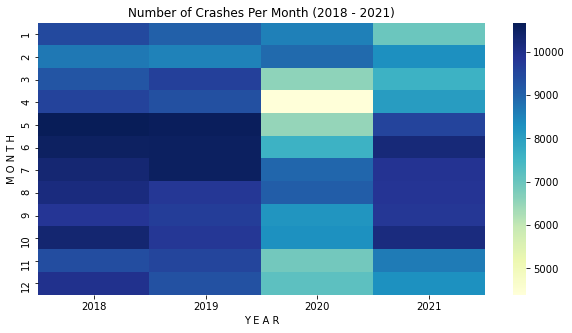

In [8]:
#--------------- Heatmap showing number of crashes with Years on the x-axis and Months on y-axis
plt.figure(figsize=(10, 5)) 
s = sns.heatmap(ym_pivot, cmap="YlGnBu")
s.set(xlabel='Y E A R', ylabel='M O N T H', title="Number of Crashes Per Month (2018 - 2021)");

`There is a visible reduction in the number of road accidents in 2020 compared to other years, in addition there is a general rise in the number of accidents starting May - August (summer time) for all years in the dataset. The graph aligns with initial hypothesis that the total number road accidents declined during the earlier months of the pandamic due to social and work environment changes that limited movement. Graph also shows that, nearly for all months, road accidents has increased in 2021 compared to 2020.`

In [9]:
"""
By plotting a heatmap of time of day and year check to view if there
is a correlation between these features and number of accidents
as well as changes in trend due to COVID-19
"""

yh = crash_df.groupby(['YEAR', 'HOUR']).size().reset_index().rename(columns={0:"CRASHES"})
yh.head(2)

,YEAR,HOUR,CRASHES
0,2018,0,2308
1,2018,1,1976


In [10]:
yh_pivot = pd.pivot_table(data=yh, index="HOUR", columns="YEAR", values="CRASHES")

#### Heatmap : Hour Vs Year Vs Number of Crashes

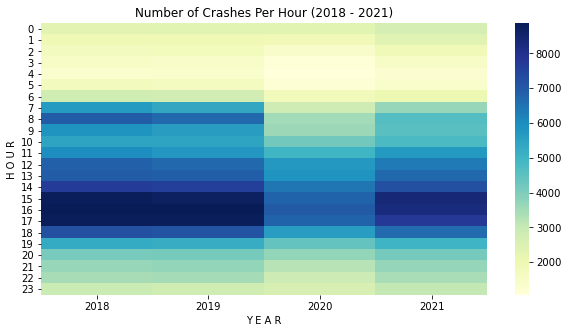

In [11]:
#--------------- Heatmap showing number of crashes with Years on the x-axis and Hour on y-axis
plt.figure(figsize=(10, 5)) 
s = sns.heatmap(yh_pivot, cmap="YlGnBu")
s.set(xlabel='Y E A R', ylabel='H O U R', title="Number of Crashes Per Hour (2018 - 2021)");

`There is a visible reduction in the number of road accidents in 2020 compared to other years, typically vast majority of accidents take place between 7am-7pm with greater portion occuring 3pm-6pm. The graph aligns with initial hypothesis that the total number road accidents declined during the pandamic due to social and work environment changes that limited movement. Graph also shows that, nearly for all hours of a day, road accidents has increased in 2021 compared to 2020.`

In [12]:
"""
By plotting a heatmap of day of week and year check to view if there
is a correlation between these features and number of accidents
as wells as changes in trend due to COVID19
"""

yw = crash_df.groupby(['YEAR', 'WEEK_DAY_NAME']).size().reset_index().rename(columns={0:"CRASHES"})
yw.head(2)

,YEAR,WEEK_DAY_NAME,CRASHES
0,2018,Friday,18908
1,2018,Monday,17166


In [13]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

yw_pivot = pd.pivot_table(data=yw, index="WEEK_DAY_NAME", columns="YEAR", values="CRASHES").reindex(cats)

#### Heatmap :  Year Vs Day of Week Vs Number of Crashes

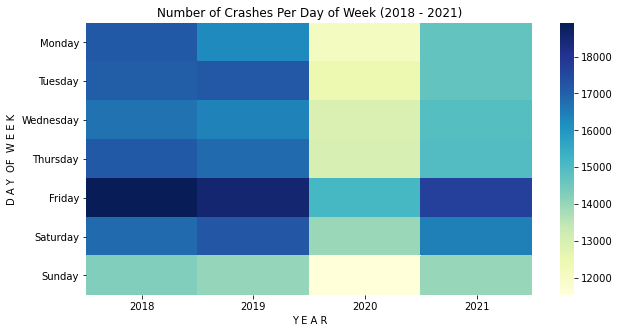

In [14]:
#--------------- Heatmap showing number of crashes with Years on the x-axis and Day of Week on y-axis
plt.figure(figsize=(10, 5)) 
s = sns.heatmap(yw_pivot, cmap="YlGnBu")
s.set(xlabel='Y E A R', ylabel='D A Y  OF  W E E K', title="Number of Crashes Per Day of Week (2018 - 2021)");

`There is a visible reduction in the number of road accidents in 2020 compared to other years, There are more accidents taking place on Fridays compared to other days of the week. The graph aligns with initial hypothesis that the total number road accidents declined during the pandamic due to social and work environment changes that limited movement. Graph also shows that, nearly for all days, road accidents has increased in 2021 compared to 2020.`

### Fatal Crashes EDA vs Total Number of Crashes

In [15]:
fatal_month = crash_df.groupby(['YEAR', 'MONTH'])["INJURIES_FATAL"].sum().reset_index()
fatal_hour  = crash_df.groupby(['YEAR', 'HOUR'])["INJURIES_FATAL"].sum().reset_index()
fatal_week  = crash_df.groupby(['YEAR', 'WEEK_DAY_NAME'])["INJURIES_FATAL"].sum().reset_index()
fatal_month.head(2)

,YEAR,MONTH,INJURIES_FATAL
0,2018,1,11
1,2018,2,6


In [16]:
pv_week  = pd.pivot_table(data=fatal_week, index="WEEK_DAY_NAME", columns="YEAR", values="INJURIES_FATAL")
pv_hour  = pd.pivot_table(data=fatal_hour, index="HOUR", columns="YEAR", values="INJURIES_FATAL")
pv_month = pd.pivot_table(data=fatal_month, index="MONTH", columns="YEAR", values="INJURIES_FATAL")

#### Line Graph : Number of Accidents Over Time

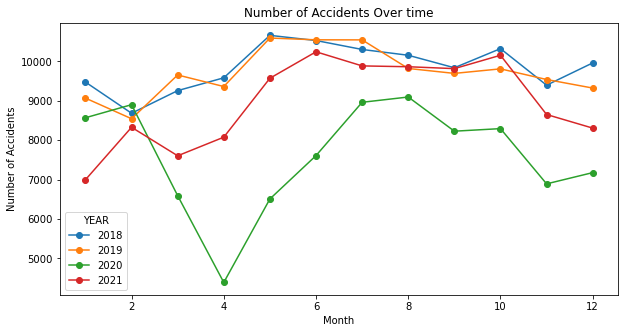

In [17]:
MMYYYY = crash_df.groupby(['YEAR', 'MONTH']).size().reset_index().rename(columns={0:"CRASHES"})
MMYYYY.head(2)
ym_pivot = pd.pivot_table(data=MMYYYY, index="MONTH", columns="YEAR", values="CRASHES")


ym_pivot.plot(style="-o", figsize=(10,5))
plt.title("Number of Accidents Over time")
plt.xlabel("Month")
plt.ylabel("Number of Accidents");

`The number of total accidents at the start of 2020 was comparative with other years, however a sharp reduction started around  March 2021. Overall there were fewer road accidents in 2020 compared to the other years in the dataset.`

#### Line Graph : Number of Fatal Accidents over Time

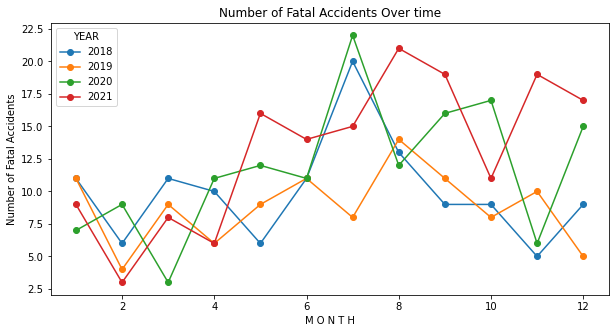

In [18]:
pv_month.plot(style="-o", figsize=(10,5))
plt.title("Number of Fatal Accidents Over time")
plt.xlabel("M O N T H")
plt.ylabel("Number of Fatal Accidents");

`The number of total fatal accidents at the start of 2020 was comparative with other years, however a sharp reduction started around  March 2021 yet the trend did not prolong. For the most of 2020 there were more recorded fatal accidents compared to the previous 2 years.`

#### Boxplot : Number of Accidents Over Time

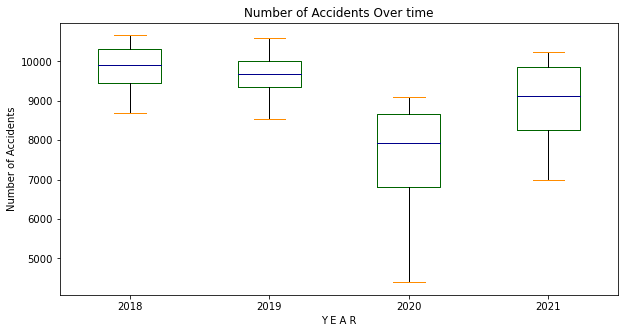

In [19]:
color = {
    "boxes"   : "DarkGreen",
    "whiskers": "Black",
    "medians" : "DarkBlue",
    "caps"    : "DarkOrange",
}
ym_pivot.plot.box(vert=True, figsize=(10,5), color=color)
plt.title("Number of Accidents Over time")
plt.xlabel("Y E A R")
plt.ylabel("Number of Accidents");

`Boxplot confirms finding depicted on the line graph from above, in 2020 there was a reduction in the number of traffic accidents compared to 2018 & 2019.`

#### Boxplot : Number of Fatal Accidents Over Time

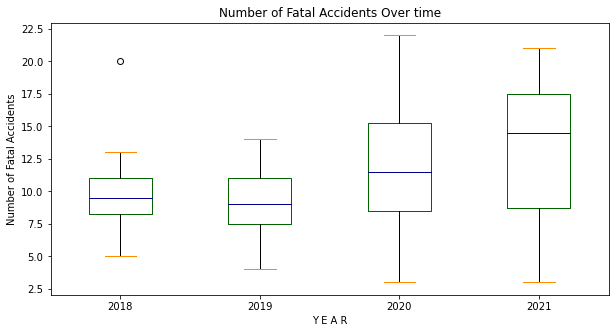

In [20]:
color = {
    "boxes"   : "DarkGreen",
    "whiskers": "Black",
    "medians" : "DarkBlue",
    "caps"    : "DarkOrange",
}

pv_month.plot.box(vert=True, figsize=(10,5), color=color)
plt.title("Number of Fatal Accidents Over time")
plt.xlabel("Y E A R")
plt.ylabel("Number of Fatal Accidents");

`Boxplot confirms finding depicted on the line graph from above, in 2020 there was a rise in the number of fatal traffic accidents compared to 2018 & 2019 and the trend in spike of fatal accidents continued in 2021`

#### Bar Graph : Number of Accidents Over Time

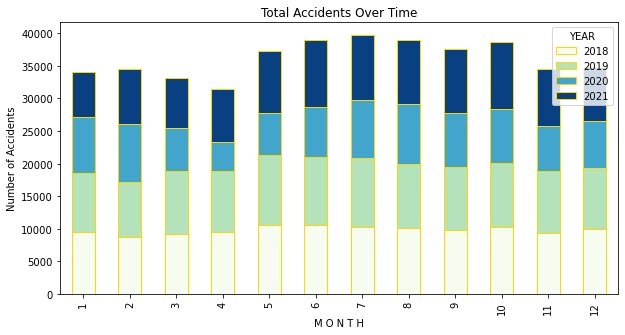

In [21]:
colors = plt.cm.GnBu(np.linspace(0, 1, 4))
ym_pivot.plot(figsize=(10, 5),edgecolor='gold',kind='bar', stacked=True, color=colors)
plt.title("Total Accidents Over Time")
plt.xlabel("M O N T H")
plt.ylabel("Number of Accidents");

`Stacked bar graph highlights the number of accidents for each month sliced by year, for vast majority of the months there were fewer accidents in 2020 compared to other years.`

#### Bar Graph : Number of Fatal Accidents Over Time

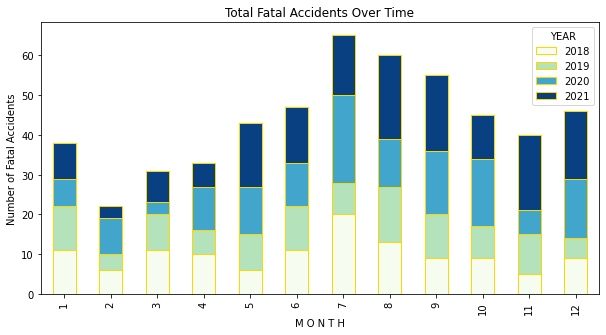

In [22]:
colors = plt.cm.GnBu(np.linspace(0, 1, 4))
pv_month.plot(figsize=(10, 5),edgecolor='gold',kind='bar', stacked=True, color=colors)
plt.title("Total Fatal Accidents Over Time")
plt.xlabel("M O N T H")
plt.ylabel("Number of Fatal Accidents");

`Stacked bar graph highlights the number of fatal accidents for each month sliced by year, for vast majority of the months there were more fatal accidents in 2020 compared to other years (especially in July 2020). There were fewer recorded crash accidents in March, 2020 which may be attributed to an immediate effect of COVID-19 yet all other months of the year experienced more accidents than previous (pre-COVID-19) years.`

## Percentage change in Traffic Accident 

In [23]:
#------------------- Find total number of crashes
total_crashes = crash_df.groupby(['YEAR']).size().reset_index().rename(columns={0:"CRASHES"})
total_crashes

,YEAR,CRASHES
0,2018,118164
1,2019,116502
2,2020,91228
3,2021,107501


In [24]:
#------------------- Add a field of percent change in traffic accidents
total_crashes["pct_CHANGE"] = (total_crashes["CRASHES"].pct_change())*100
total_crashes

,YEAR,CRASHES,pct_CHANGE
0,2018,118164,NaN
1,2019,116502,-1.406520
2,2020,91228,-21.694048
3,2021,107501,17.837725


###  There was a 21% decline in total crashes in 2020 from 2019 

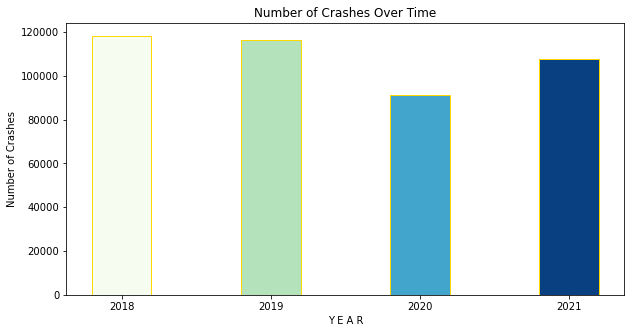

In [25]:
#------------------- Plot a bar graph showing total traffic crashes over time
fig = plt.figure(figsize=(10,5))
colors = plt.cm.GnBu(np.linspace(0, 1,4))
plt.bar(total_crashes["YEAR"], total_crashes["CRASHES"], color=colors, width=0.4, edgecolor='gold')
plt.locator_params(integer=True)
plt.xlabel("Y E A R")
plt.ylabel("Number of Crashes")
plt.title("Number of Crashes Over Time");

In [26]:
#------------------- Find total number of fatal crashes
fatal_crashes = crash_df.groupby(['YEAR'])["INJURIES_FATAL"].sum().reset_index()
fatal_crashes

,YEAR,INJURIES_FATAL
0,2018,120
1,2019,106
2,2020,141
3,2021,158


In [27]:
#------------------- Add a field of percent change in fatal traffic accidents
fatal_crashes["pct_CHANGE"] = (fatal_crashes['INJURIES_FATAL'].pct_change())*100
fatal_crashes

,YEAR,INJURIES_FATAL,pct_CHANGE
0,2018,120,NaN
1,2019,106,-11.666667
2,2020,141,33.018868
3,2021,158,12.056738


###  There was a 33% increase in fatal crashes in 2020 from 2019

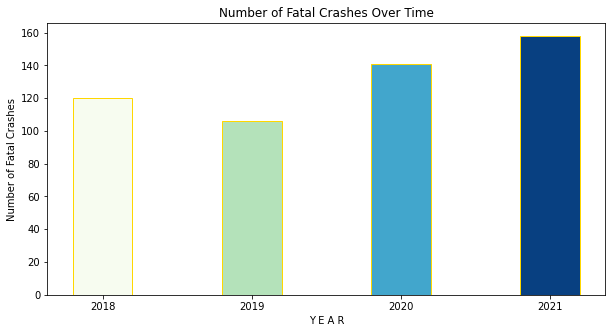

In [28]:
#------------------- Plot a bar graph showing total fatal traffic crashes over time
fig = plt.figure(figsize=(10,5))
colors = plt.cm.GnBu(np.linspace(0, 1,4))
plt.bar(fatal_crashes["YEAR"], fatal_crashes["INJURIES_FATAL"], color=colors, width=0.4,edgecolor='gold')
plt.locator_params(integer=True)
plt.xlabel("Y E A R")
plt.ylabel("Number of Fatal Crashes")
plt.title("Number of Fatal Crashes Over Time");

`Summary : In the city of Chicago (within the limit of the dataset) the total number of crashes declined by ~ 22% while the total number of fatal crashes increased by ~ 33% in 2020 in comparison to 2019`

## Impact of Road Condition on Number of Accidents

In [29]:
crash_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'HOUR', 'MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'YEAR', 'WEEK_DAY_NAME'],
      dtype='object')

In [30]:
road_crashes = crash_df.groupby(['ROADWAY_SURFACE_COND']).size().reset_index().rename(columns={0:"CRASHES"})
road_crashes

,ROADWAY_SURFACE_COND,CRASHES
0,DRY,324056
1,UNKNOWN_OTHER,31014
2,WET_SNOW_ICE_etc,78325


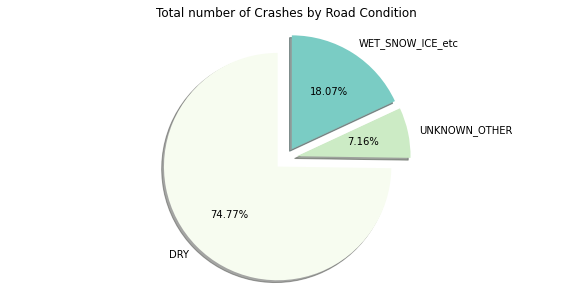

In [31]:
colors = plt.cm.GnBu(np.linspace(0, 1,5))
fig = plt.figure(figsize=(10,5))
plt.pie(road_crashes["CRASHES"] , labels =road_crashes["ROADWAY_SURFACE_COND"], 
        startangle=90, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%',
        colors=colors)
plt.title('Total number of Crashes by Road Condition')

plt.axis('equal')

plt.show();

#### `Majority (~75%) of road accidents in our datasets took place under normal road conditions`

In [32]:
road_fatal_crashes = crash_df.groupby(['ROADWAY_SURFACE_COND'])["INJURIES_FATAL"].sum().reset_index()
road_fatal_crashes

,ROADWAY_SURFACE_COND,INJURIES_FATAL
0,DRY,409
1,UNKNOWN_OTHER,21
2,WET_SNOW_ICE_etc,95


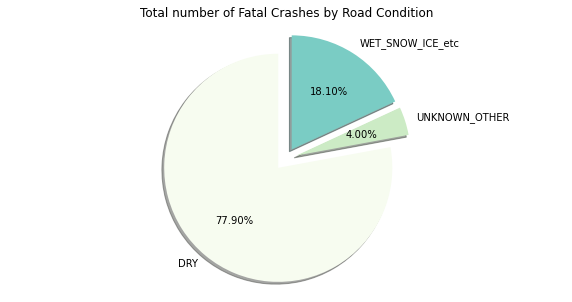

In [33]:
colors = plt.cm.GnBu(np.linspace(0, 1,5))
fig = plt.figure(figsize=(10,5))
plt.pie(road_fatal_crashes["INJURIES_FATAL"] , labels =road_fatal_crashes["ROADWAY_SURFACE_COND"], 
        startangle=90, shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%',
        colors=colors)
plt.title('Total number of Fatal Crashes by Road Condition')

plt.axis('equal')

plt.show();

#### `Majority (~78%) of fatal road accidents in our datasets took place under normal road conditions`

### EDA on Chicago People Crash Dataset (2018-2021)

`Chicago Crash People Data 
This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset.` <a href="https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d"><code>.datalink</code></a>

In [34]:
people_df = pd.read_csv("chicago_data/chicago_clean_crash_people_2022.csv", index_col=False)
people_df = people_df.iloc[: , 1:]

In [35]:
people_df.head(3)

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,INJURY_CLASSIFICATION,YEAR,SEX,AGE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,2019-09-28 03:30:00,NO INDICATION OF INJURY,2019,MALE,25
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,2020-04-13 22:50:00,NO INDICATION OF INJURY,2020,MALE,37
2,O848601,DRIVER,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,2020-02-23 18:15:00,NO INDICATION OF INJURY,2020,FEMALE,34


In [36]:
d_df = people_df[people_df["PERSON_TYPE"]=="DRIVER"].sort_values("CRASH_RECORD_ID")
sx_yr = d_df.groupby(["YEAR","SEX"]).size().reset_index().rename(columns={0:"CRASHES"})
sx_yr.head(2)

,YEAR,SEX,CRASHES
0,2018,FEMALE,72034
1,2018,MALE,112859


In [37]:
pv_sx = pd.pivot_table(data=sx_yr, index="YEAR", columns="SEX", values="CRASHES")

#### Stacked Bar Graph : Sex vs Year vs Total Number of Accidents

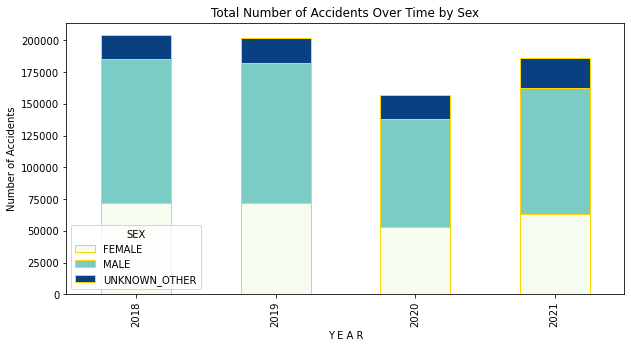

In [38]:
pv_sx.plot(figsize=(10, 5),edgecolor='gold',kind='bar', stacked=True, colormap="GnBu")
plt.title("Total Number of Accidents Over Time by Sex")
plt.xlabel("Y E A R")
plt.ylabel("Number of Accidents");

`Male drivers are more invoved in traffic crashes in all four years`

### Merge Crash & People Crash datasets for further EDA

In [39]:

"""
Crash record id is a field located under both tables, it is a primary key under 
crash table and foreign key under
people crash table

"""

print(crash_df[crash_df.duplicated(['CRASH_RECORD_ID'], keep=False)].shape[0])
print(people_df[people_df.duplicated(['CRASH_RECORD_ID'], keep=False)].shape[0])

0
860543


In [40]:
id_peopleonly = people_df[~people_df.CRASH_RECORD_ID.isin(crash_df.CRASH_RECORD_ID)].shape[0]
id_crashonly  = crash_df[~crash_df.CRASH_RECORD_ID.isin(people_df.CRASH_RECORD_ID)].shape[0]

print(f"There are {id_peopleonly} crash id located under people crash dataset not in crash datasets and {id_crashonly}\
 records located under crash dataset but not under people crash datasets")

There are 8684 crash id located under people crash dataset not in crash datasets and 0 records located under crash dataset but not under people crash datasets


`It best practice to join on CRASH_RECORD_ID with crash_df being the left table since all crash id under crash table are also present under people_df or inner join should also yield the same outcome.`

In [41]:
crash_merge = crash_df.merge(people_df[["CRASH_RECORD_ID","PERSON_ID","PERSON_TYPE","SEX","AGE","INJURY_CLASSIFICATION"]], 
                       on="CRASH_RECORD_ID", how="inner")
crash_merge.head(2)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,...,LATITUDE,LONGITUDE,LOCATION,YEAR,WEEK_DAY_NAME,PERSON_ID,PERSON_TYPE,SEX,AGE,INJURY_CLASSIFICATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,35,CLEAR,DRY,NO_DEFECTS,NO INJURY / DRIVE AWAY,2.0,0,0,...,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,Wednesday,O690420,DRIVER,MALE,31,NO INDICATION OF INJURY
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,35,CLEAR,DRY,NO_DEFECTS,NO INJURY / DRIVE AWAY,2.0,0,0,...,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,Wednesday,O690421,DRIVER,MALE,43,NO INDICATION OF INJURY


#### Validate Data Integrity and Consistency after merge

In [42]:
#-------------------- Merged dataframe size and the number of crash record id values located under people dataframe also 
# present under crash dataframe are equal
print(crash_merge.shape[0])
print(people_df[people_df.CRASH_RECORD_ID.isin(crash_df.CRASH_RECORD_ID)].shape[0])

960656
960656


In [43]:
total_crashes = crash_df.groupby(['YEAR']).size().reset_index().rename(columns={0:"CRASHES"})
total_crashes

,YEAR,CRASHES
0,2018,118164
1,2019,116502
2,2020,91228
3,2021,107501


In [44]:
merge_crashes = crash_merge.groupby(["CRASH_RECORD_ID","YEAR"]).size().reset_index().groupby(["YEAR"]).size().reset_index().rename(columns={0:"CRASHES"})
merge_crashes

,YEAR,CRASHES
0,2018,118164
1,2019,116502
2,2020,91228
3,2021,107501


`Data ties back accurately as expected after merge`

#### Determine sex breakdown for fatal crashes

In [45]:
crash_df.groupby(['YEAR'])["INJURIES_FATAL"].sum().reset_index()

,YEAR,INJURIES_FATAL
0,2018,120
1,2019,106
2,2020,141
3,2021,158


In [46]:
crash_merge_v2 = crash_merge.copy()
crash_merge_v2 = crash_merge.drop_duplicates(subset=["CRASH_RECORD_ID"], keep='first')

In [47]:
mr_sx = crash_merge_v2.groupby(['YEAR',"SEX"])["INJURIES_FATAL"].sum().reset_index()
mr_sx.groupby(['YEAR'])["INJURIES_FATAL"].sum().reset_index()

,YEAR,INJURIES_FATAL
0,2018,120
1,2019,106
2,2020,141
3,2021,158


### Stacked Bar Graph : Sex vs Year Vs Total Number of Fatal Accidents

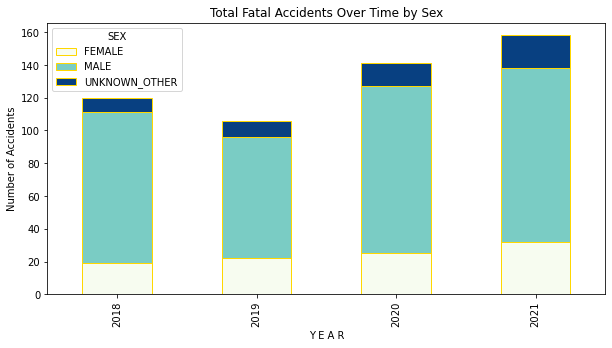

In [48]:

pv_mr_sx = pd.pivot_table(data=mr_sx, index="YEAR", columns="SEX", values="INJURIES_FATAL")

colors = plt.cm.GnBu(np.linspace(0, 1, 3))
pv_mr_sx.plot(figsize=(10, 5),edgecolor='gold',kind='bar', stacked=True, color=colors)
plt.title("Total Fatal Accidents Over Time by Sex")
plt.xlabel("Y E A R")
plt.ylabel("Number of Accidents");


`Male drivers are more invoved in fatal traffic crashes in all four years`

### Location vs Traffic Crashes

#### For first 1,000 crashes pre(orange circle) & post(red circle) covid-19 heatmap

In [49]:
pre_covid  = crash_df.loc[crash_df["YEAR"]<=2019,["LATITUDE","LONGITUDE"]]
post_covid = crash_df.loc[crash_df["YEAR"]>=2020,["LATITUDE","LONGITUDE"]]


folium_map = folium.Map(location=[41.88, -87.62],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
for i in range(1000):
    marker = folium.CircleMarker(location=[post_covid["LATITUDE"].iloc[i],post_covid["LONGITUDE"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)  
        
for i in range(1000):
    marker = folium.CircleMarker(location=[pre_covid["LATITUDE"].iloc[i],pre_covid["LONGITUDE"].iloc[i]],radius=5,color="orange",fill=True)
    marker.add_to(folium_map)


folium_map

`Geographic heat map for the first 1,000 crashes in the City of Chicago pre & post covid19, at least for the first 1,000 crashes there is no apparent shift in the location of where traffic accidents took place pre & post covid19`

#### Fatal crashes : pre(orange circle) & post(red circle) covid-19 heatmap

In [59]:
pre_covid  = crash_df.loc[(crash_df["INJURIES_FATAL"]>=1)&(crash_df["YEAR"]<=2019),["LATITUDE","LONGITUDE"]]
post_covid = crash_df.loc[(crash_df["INJURIES_FATAL"]>=1)&(crash_df["YEAR"]>=2020),["LATITUDE","LONGITUDE"]]

# Chicago lat & log coordiantes (41.88, -87.62)
folium_map = folium.Map(location=[41.88, -87.62],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")

for i in range(post_covid.shape[0]):
    marker = folium.CircleMarker(location=[post_covid["LATITUDE"].iloc[i],post_covid["LONGITUDE"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)  
    
for i in range(pre_covid.shape[0]):
    marker = folium.CircleMarker(location=[pre_covid["LATITUDE"].iloc[i],pre_covid["LONGITUDE"].iloc[i]],radius=5,color="orange",fill=True)
    marker.add_to(folium_map)


        
folium_map
#folium_map.save("hmap.html")

`Heatmap shows there were more traffic fatal crashes post COVID-19 (red circle) than pre COVID-19 (orange circle), certain areas such as north-eastern part of Chicago endured more/newer fatal accidents  post COVID-19. `

### EDA on Chicago People Vehicles Dataset (2018-2021)

`Chicago Crash People Data 
This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset should be used in conjunction with the traffic Crash and People dataset available in the portal. ` <a href="https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3"><code>.datalink</code></a>

In [51]:
vehicles_df = pd.read_csv("chicago_data/chicago_clean_crash_vehicles_2022.csv", index_col=False)
vehicles_df = vehicles_df.iloc[: , 1:]
vehicles_df.shape

(811696, 4)

#### Interested in crash records with crash id present under both tables

In [52]:
crash_merge2 = crash_df.merge(vehicles_df, on="CRASH_RECORD_ID", how="inner")
crash_merge2.head(2)

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,...,HOUR,MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,WEEK_DAY_NAME,UNIT_TYPE,VEHICLE_YEAR,VEHICLE_AGE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,35,CLEAR,DRY,NO_DEFECTS,NO INJURY / DRIVE AWAY,2.0,0,0,...,17,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,Wednesday,DRIVER,1995,GreaterThan20Yrs
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,35,CLEAR,DRY,NO_DEFECTS,NO INJURY / DRIVE AWAY,2.0,0,0,...,17,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,Wednesday,DRIVER,2012,LessThan10Yrs


In [53]:
pre_vehicleage = crash_merge2[crash_merge2["YEAR"]<=2019].groupby(["VEHICLE_AGE"]).size().reset_index().\
rename(columns={0:"CRASHES"})

In [54]:
pct_Total = []
for x in range(pre_vehicleage.shape[0]):
    pct_Total.append((pre_vehicleage.iloc[x][1])/(pre_vehicleage["CRASHES"].sum()))
pre_vehicleage["pct_Total"] = pct_Total
pct_Total = pre_vehicleage["pct_Total"].round(2)
pre_vehicleage["pct_Total"] = pct_Total

In [55]:
pre_vehicleage.sort_values("pct_Total",ascending=False)

,VEHICLE_AGE,CRASHES,pct_Total
3,LessThan10Yrs,169547,0.51
0,10-15Yrs,88321,0.27
1,16-20Yrs,52377,0.16
2,GreaterThan20Yrs,20303,0.06


In [56]:
pre_vehicleage = crash_merge2[crash_merge2["YEAR"]<=2019].groupby(["VEHICLE_AGE"]).size().reset_index().\
rename(columns={0:"CRASHES"})

In [57]:
post_vehicleage = crash_merge2[crash_merge2["YEAR"]>=2020].groupby(["VEHICLE_AGE"]).size().reset_index().\
rename(columns={0:"CRASHES"})

### Total number of Crashes by Age of Vehicles Pre COVID-19

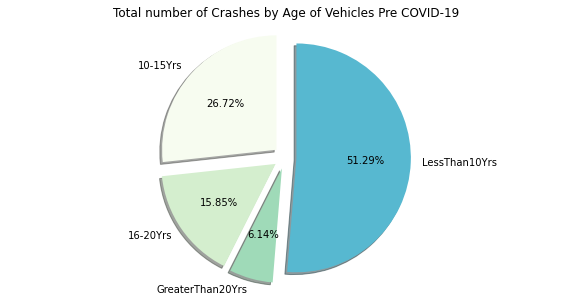

In [60]:
colors = plt.cm.GnBu(np.linspace(0, 1,6))
fig = plt.figure(figsize=(10,5))
plt.pie(pre_vehicleage["CRASHES"] , labels=pre_vehicleage["VEHICLE_AGE"], 
        startangle=90, shadow=True,explode=(0.1, 0.1, 0.1,0.1), autopct='%1.2f%%',
        colors=colors)
plt.title('Total number of Crashes by Age of Vehicles Pre COVID-19')

plt.axis('equal')

plt.show();

### Total number of Crashes by Age of Vehicles Post COVID-19

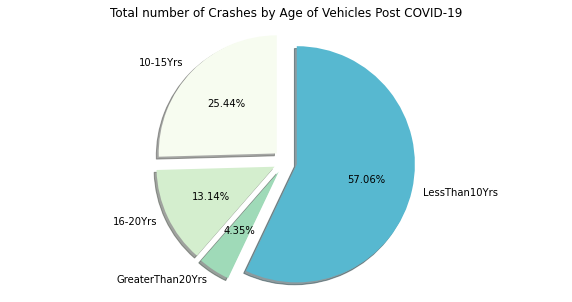

In [61]:
colors = plt.cm.GnBu(np.linspace(0, 1,6))
fig = plt.figure(figsize=(10,5))
plt.pie(post_vehicleage["CRASHES"] , labels=post_vehicleage["VEHICLE_AGE"], 
        startangle=90, shadow=True,explode=(0.1, 0.1, 0.1,0.1), autopct='%1.2f%%',
        colors=colors)
plt.title('Total number of Crashes by Age of Vehicles Post COVID-19')

plt.axis('equal')

plt.show();

`There is not a significant change in the trend of the age of vehicles involved in accidents pre & post COVID-19. Over 50% of vehicles invoved in crashes in both time lines were vehicles manufactured less than 10 years from when the accident occured. Most vehicles invoved in crashes are relatively young in age, it may be logical to assume (although more investigation needed) that physical and mental conditions of drivers contributes more to road accidents than conditions of vehicles in the given datasets. `